## Ensar Güven 

# ROADMAP

## 1. Sektörler Listesini Elde Etme:

### Web Scraping:

- BeautifulSoup veya Selenium gibi bir web scraping kütüphanesi kullanın.
- Hedef web sitesine (örneğin, yfinance, investpy veya Quandl) erişin ve sektör listesini içeren HTML öğesini bulun.
- Sektör isimlerini ve varsa kodlarını ayıklayın.

### Verilerin Saklanması:

- Elde edilen verileri bir pandas DataFrame'e dönüştürün.
- DataFrame'i CSV dosyası veya pickle dosyası olarak kaydedin.

## 2. Aylık Getiri Serilerini Elde Etme:

### Yfinance Kütüphanesi:

- yfinance.download fonksiyonunu kullanarak her sektör için 2005-01-01 tarihinden itibaren aylık hisse senedi fiyatlarını indirin.
- Aylık getirileri hesaplamak için her ayın son ve ilk fiyatlarını kullanın.

### Verilerin Saklanması:

- Her sektör için aylık getiri serilerini içeren birer pandas DataFrame oluşturun.
- DataFrame'leri CSV dosyaları veya pickle dosyaları olarak kaydedin.

## 3. Büyük Sektörler Üzerinden Getiri Faktörlerini Hesaplama:

### Momentum Faktörü:

- Her sektör için 12 aylık, 6 aylık ve 3 aylık momentum faktörlerini hesaplayın.
- Ek olarak, Sharpe oranı ve Sortino oranı gibi diğer risk-ödül ölçümlerini de hesaplayabilirsiniz.

### Verilerin Saklanması:

- Hesaplanan faktörleri içeren bir pandas DataFrame oluşturun.
- DataFrame'i CSV dosyası veya pickle dosyası olarak kaydedin.

## 4. TSFresh ile Feature Engineering:

### TSFresh Kütüphanesi:

- tsfresh kütüphanesini kullanarak getiri serileri üzerinde imputation, encoding, transformation ve daha fazlasını içeren özellik mühendisliği işlemleri uygulayın.
- Farklı zaman pencereleri ve parametreler ile denemeler yaparak en iyi performansı gösteren özellikleri seçin.

## 5. Yeni Elde Edilmiş Feature ve Sektör Sınıfları Üzerinden Bir Model Kurulması:

- Farklı makine öğrenme modelleri deneyin (örneğin, Logistic Regression, Random Forest, LightGBM).
- Yeni özelliklerin ve sektör sınıflarının model performansını nasıl etkilediğini analiz edin.
- En iyi model seçimi metriklerini (örneğin, doğruluk, F1 skoru, AUC) kullanarak en iyi modeli seçin.
- En iyi modelin performansını yorumlayın ve modelin güvenilirliğini analiz edin.


### 1. Sektörler Listesini Elde Etme:

In [4]:
import yfinance
import pandas as pd
import requests
from bs4 import BeautifulSoup

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

In [5]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [6]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1385,"9,694.03B",2.41%,14.72,17.75%,0.54%,11.63%
1,Healthcare,1216,"8,179.35B",0.43%,50.92,4.08%,1.32%,7.51%
2,Technology,787,17.76T,0.43%,44.94,13.17%,0.28%,15.00%
3,Industrials,651,"5,483.08B",1.11%,26.72,7.33%,0.55%,17.68%
4,Consumer Discretionary,577,"7,275.66B",0.65%,27.38,5.95%,0.31%,2.23%
5,Materials,263,"2,071.38B",1.56%,19.63,8.68%,0.45%,2.24%
6,Real Estate,262,"1,506.50B",4.11%,50.58,8.91%,-0.13%,6.94%
7,Communication Services,260,"5,360.61B",1.09%,28.01,10.40%,0.29%,2.07%
8,Energy,253,"3,648.25B",2.85%,8.02,12.42%,0.43%,18.22%
9,Consumer Staples,241,"4,037.37B",1.45%,29.75,4.72%,0.45%,12.18%


In [7]:
financials_data = fetch_data("financials")


In [8]:
financials_data


,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,BRK.B,Berkshire Hathaway Inc.,885.23B,0.34%,4269084,439.34B
1,V,Visa Inc.,581.38B,-1.18%,5096646,33.35B
2,JPM,JPMorgan Chase & Co.,548.13B,1.24%,9309517,158.10B
3,MA,Mastercard Incorporated,443.90B,-0.76%,2172459,25.10B
4,BAC,Bank of America Corporation,279.41B,-0.78%,39801161,98.58B
...,...,...,...,...,...,...
993,NCPL,Netcapital Inc.,1.91M,-4.69%,344426,8.94M
994,TIRX,Tian Ruixiang Holdings Ltd,1.78M,2.34%,11575,1.13M
995,RELI,"Reliance Global Group, Inc.",1.67M,-4.03%,130520,14.57M
996,DXF,Dunxin Financial Holdings Limited,1.46M,-3.37%,321818,-2.77M


In [4]:
indusrty

,Industry Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Biotechnology,690,"1,509.61B",0.02%,-,-26.04%,3.02%,19.51%
1,Asset Management,483,"1,109.60B",5.62%,34.20,10.54%,0.10%,6.96%
2,Banks - Regional,356,"1,299.23B",2.72%,9.83,23.52%,-0.09%,5.99%
3,Software - Application,249,"2,276.38B",0.12%,167.08,4.53%,26.60%,20.78%
4,Shell Companies,243,61.68B,0.02%,-,-37.99%,-0.23%,7.18%
...,...,...,...,...,...,...,...,...
140,Utilities - Independent Power Producers,5,40.35B,2.81%,42.84,1.94%,0.65%,51.16%
141,Aluminum,4,10.76B,2.48%,-,-2.70%,2.16%,10.57%
142,Confectioners,4,138.97B,2.49%,20.12,14.40%,-1.38%,-15.70%
143,Infrastructure Operations,3,7.91B,0.18%,43.68,5.71%,0.90%,6.45%


## Sektor listerine erismek

Yukarida yazilan fonksyionlar ile hangi sembollerin hangi sektorlerde oldugu bilgisine erisim saglanabilir ve asagidaki betikler yardimi ile `.csv` dosyalarinda saklayabiliriz. Sonrasinda, sektor bazli sembollere ait verileri indirilebilir ve siniflandirilabilir.

In [8]:
fetch_data(sectors='energy').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/energy.csv')
fetch_data(sectors='financials').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/financials.csv')
fetch_data(sectors='healthcare').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/healthcare.csv')
fetch_data(sectors='technology').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/technology.csv')
fetch_data(sectors='utilities').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/utilities.csv')
fetch_data(sectors='real-estate').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/real-estate.csv')
fetch_data(sectors='materials').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/materials.csv')
fetch_data(sectors='technology').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/technology.csv')
fetch_data(sectors='industrials').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/communication-services.csv')

In [9]:
finance = pd.read_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/financials.csv')
finance.Symbol


0       BRK.B
1           V
2         JPM
3          MA
4         BAC
        ...  
998      NCPL
999      RELI
1000     TIRX
1001      DXF
1002    AIMAU
Name: Symbol, Length: 1003, dtype: object

In [10]:
finance['Company Name']


0                 Berkshire Hathaway Inc.
1                               Visa Inc.
2                    JPMorgan Chase & Co.
3                 Mastercard Incorporated
4             Bank of America Corporation
                      ...                
998                       Netcapital Inc.
999           Reliance Global Group, Inc.
1000           Tian Ruixiang Holdings Ltd
1001    Dunxin Financial Holdings Limited
1002         Aimfinity Investment Corp. I
Name: Company Name, Length: 1003, dtype: object

## Veriye erismek
Diyelim ki, finans sektorunden `HSBC` sembolu icin verileri indirmek istiyoruz. Bu adim icin `yfinance` kullanilabilir. Oncelikle `.Ticker` ile bir object olusturup onun uzerinden dogru hissemi olduguna dair bilgileri teyit edebiliriz. Sonrasinda `.get_history_metadata()` ile sembolun metedatasina erisim saglayabiliriz. Sonrasinda, `.history(period='3y')` ile 3 yillik veriyi calisma ortamimiza indirebiliriz.

In [11]:
import yfinance
ticker_name = yfinance.Ticker("HSBC") #Ticker sınıfı, yfinance kütüphanesindeki bir sınıftır ve belirli bir hisse senedinin veya finansal varlığın verilerini almak için kullanılır. 
ticker_name.info

{'address1': '8 Canada Square',
 'city': 'London',
 'zip': 'E14 5HQ',
 'country': 'United Kingdom',
 'phone': '44 20 7991 8888',
 'fax': '44 20 7992 4880',
 'website': 'https://www.hsbc.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'HSBC Holdings plc provides banking and financial services worldwide. The company operates through Wealth and Personal Banking, Commercial Banking, and Global Banking and Markets segments. The Wealth and Personal Banking segment offers retail banking and wealth products, including current and savings accounts, mortgages and personal loans, credit and debit cards, and local and international payment services; and wealth management services comprising insurance and investment products, global asset management services, investment management, and private wealth 

In [12]:
ticker_name.get_history_metadata()

{'currency': 'USD',
 'symbol': 'HSBC',
 'exchangeName': 'NYQ',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 932131800,
 'regularMarketTime': 1710532802,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 38.21,
 'chartPreviousClose': 37.44,
 'previousClose': 37.53,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1710489600,
   'end': 1710509400,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1710509400,
   'end': 1710532800,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1710532800,
   'end': 1710547200,
   'gmtoffset': -14400}},
 'tradingPeriods':                                           pre_start                   pre_end  \
 Date                                                                            
 2024-03-11 00:00:00-04:00 2024-03-08 04:00:00-05:00 2024-03-08 09:30:00-05:00   
 2024-03-12 00:00

In [15]:
data=ticker_name.history(period='3y')
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-11 00:00:00-04:00,37.029999,37.200001,36.930000,37.130001,2471600,0.0,0.0
2024-03-12 00:00:00-04:00,37.980000,38.090000,37.840000,38.009998,2409500,0.0,0.0
2024-03-13 00:00:00-04:00,38.119999,38.189999,37.790001,37.990002,2041000,0.0,0.0
2024-03-14 00:00:00-04:00,37.720001,37.810001,37.380001,37.529999,1389600,0.0,0.0
2024-03-15 00:00:00-04:00,38.090000,38.290001,38.040001,38.209999,2243000,0.0,0.0


In [16]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-16 00:00:00-04:00,25.145446,25.145446,24.687331,24.933355,1770400,0.0,0.0
2021-03-17 00:00:00-04:00,25.315119,25.476308,25.119996,25.315119,2479800,0.0,0.0
2021-03-18 00:00:00-04:00,25.612048,26.231352,25.603564,25.790203,3788400,0.0,0.0
2021-03-19 00:00:00-04:00,25.103029,25.450857,24.865487,25.399956,3088800,0.0,0.0
2021-03-22 00:00:00-04:00,25.026676,25.035159,24.823069,24.890938,1678700,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,37.029999,37.200001,36.930000,37.130001,2471600,0.0,0.0
2024-03-12 00:00:00-04:00,37.980000,38.090000,37.840000,38.009998,2409500,0.0,0.0
2024-03-13 00:00:00-04:00,38.119999,38.189999,37.790001,37.990002,2041000,0.0,0.0


In [17]:
# Hisse senedi verilerini indirin
ticker_list = ['AAPL', 'NVDA', 'INTC', 'ORCL', 'SONY']
data = yfinance.download(ticker_list, start='2005-01-01')

[*********************100%%**********************]  5 of 5 completed


Simdi ise, belirlenen sembollerin verilerini belli bir tarih sonrasinda cekebiliriz. Sonrasinda aylik getirileri hesaplayabiliriz. Proje kapsaminda bu yontem kullanilacak.

### 2. Haftalık Getiri Serilerini Elde Etme:

In [19]:
# Haftalık açılış fiyatlarını alın, ilk işlem gününün açılış fiyatını kullanarak
data_open = data['Open'].resample('W-MON').first()

# Haftalık getirileri hesaplayın
weekly_returns = data_open.pct_change()+1

# NaN değerlerini kaldırın
weekly_returns = weekly_returns.dropna()


In [20]:
weekly_returns

Ticker,AAPL,INTC,NVDA,ORCL,SONY
Date,,,,,
2005-01-10,0.984717,0.980965,0.974159,0.969741,0.988193
2005-01-17,1.069917,0.979301,0.920842,0.972511,1.009091
2005-01-24,1.023443,1.007045,0.972565,1.038197,1.000000
2005-01-31,1.021761,0.971578,0.971791,0.992642,0.937709
2005-02-07,1.079586,1.012151,1.107886,1.017791,1.012901
...,...,...,...,...,...
2024-02-19,0.994167,1.007026,1.011058,0.974730,1.005601
2024-02-26,0.978576,1.029302,1.021974,0.971439,0.910469
2024-03-04,0.996204,0.977180,1.103326,1.000724,0.976323


In [21]:
import numpy as np
def get_rolling_ret(data, n): 
    return data.rolling(n).apply(np.prod)

# Haftalık momentumu hesaplamak
calisilacak_veri2 = get_rolling_ret(weekly_returns, 4)  # 4 haftalık momentum örneği
calisilacak_veri2.dropna()


Ticker,AAPL,INTC,NVDA,ORCL,SONY
Date,,,,,
2005-01-31,1.101728,0.939932,0.847826,0.971902,0.935062
2005-02-07,1.207870,0.969815,0.964210,1.020059,0.958442
2005-02-14,1.158535,1.010568,1.157750,1.035141,0.949550
2005-02-21,1.240659,1.057718,1.211566,0.981604,0.978121
2005-02-28,1.209192,1.069757,1.358491,0.945886,1.036783
...,...,...,...,...,...
2024-02-19,1.019818,0.915283,1.279581,1.069354,0.983365
2024-02-26,0.932161,0.919784,1.207772,1.002267,0.892698
2024-03-04,0.948466,0.990382,1.262019,0.975829,0.879298


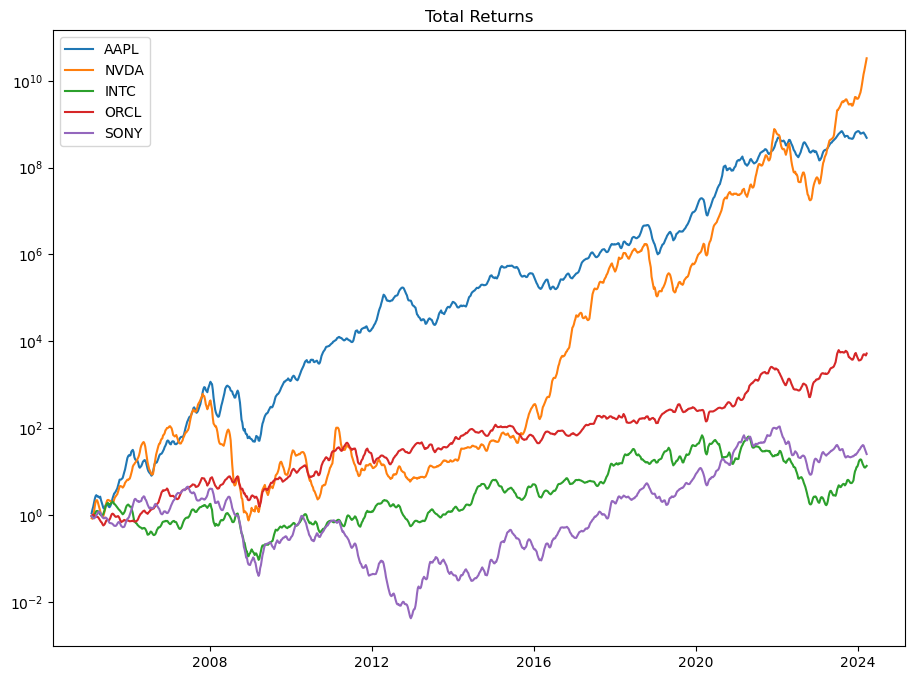

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(calisilacak_veri2[ticker].cumprod(), label = ticker)

plt.yscale('log')
plt.title('Total Returns')
plt.legend()
plt.show()

### Finans verilerinden aylık momentum hesaplanması

In [98]:
# 'Symbol' sütunundaki geçerli sembolleri al
valid_symbols_finance = finance['Symbol'].tolist()

# Geçerli semboller listesindeki her bir öğeyi string olarak kontrol et
valid_symbols_finance  = [str(symbol) for symbol in valid_symbols_finance if isinstance(symbol, str)]

# 'yfinance.download()' işlevine geçirilecek olan geçerli sembolleri kullanarak verileri indir
data_financials = yfinance.download(valid_symbols_finance, start='2005-01-01')

[*********************100%%**********************]  1003 of 1003 completed

8 Failed downloads:
['CRD.A', 'DYCQ', 'BRK.B', 'CRD.B', 'BNRE.A', 'DISA', 'LEGT', 'AGM.A']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [99]:
data_financials

Price      Adj Close                                                        \
Ticker          AACI    AACT  AAMC      AAME         AB       ABCB     ABL   
Date                                                                         
2005-01-03       NaN     NaN   NaN  2.775591   9.996135  13.030484     NaN   
2005-01-04       NaN     NaN   NaN  2.847919   9.746053  12.801766     NaN   
2005-01-05       NaN     NaN   NaN  2.802714   9.715092  12.401512     NaN   
2005-01-06       NaN     NaN   NaN  2.730386   9.705564  12.661995     NaN   
2005-01-07       NaN     NaN   NaN  2.902165   9.629348  12.484105     NaN   
...              ...     ...   ...       ...        ...        ...     ...   
2024-03-11     10.98  10.545  3.69  2.760000  33.619999  47.400002  11.285   
2024-03-12     10.99  10.550  3.45  2.760000  33.919998  46.480000  11.150   
2024-03-13     10.99  10.560  3.51  2.790000  34.099998  46.080002  12.200   
2024-03-14     10.99  10.560  3.44  2.790000  33.369999  45.369999  12.220   
2024-03-15     11.05  10.565  3.66  2.710000  33.290001  45.590000  12.200   

Price                                 ...     Volume                    \
Ticker       ABTS         AC    ACAB  ...         WU      WULF    XFIN   
Date                                  ...                                
2005-01-03    NaN        NaN     NaN  ...        NaN         0     NaN   
2005-01-04    NaN        NaN     NaN  ...        NaN     14600     NaN   
2005-01-05    NaN        NaN     NaN  ...        NaN         0     NaN   
2005-01-06    NaN        NaN     NaN  ...        NaN      2700     NaN   
2005-01-07    NaN        NaN     NaN  ...        NaN      2600     NaN   
...           ...        ...     ...  ...        ...       ...     ...   
2024-03-11  0.825  33.709000  10.750  ...  3283400.0  18460200   200.0   
2024-03-12  0.836  33.470001  11.344  ...  4716300.0  13004600  8000.0   
2024-03-13  0.825  33.380001  10.730  ...  6271000.0  13967000     0.0   
2024-03-14  0.810  33.290001  10.730  ...  5671700.0  13796800     0.0   
2024-03-15  0.750  33.980000  10.730  ...  9714000.0  13250300     0.0   

Price                                                                        
Ticker              XP      XPDB      XYF YOTA       YRD      ZION      ZLS  
Date                                                                         
2005-01-03         NaN       NaN      NaN  NaN       NaN    347900      NaN  
2005-01-04         NaN       NaN      NaN  NaN       NaN    388200      NaN  
2005-01-05         NaN       NaN      NaN  NaN       NaN    602100      NaN  
2005-01-06         NaN       NaN      NaN  NaN       NaN    321100      NaN  
2005-01-07         NaN       NaN      NaN  NaN       NaN    806100      NaN  
...                ...       ...      ...  ...       ...       ...      ...  
2024-03-11   6560300.0  799405.0  84100.0  0.0   99400.0   2607800    900.0  
2024-03-12   6420000.0   93996.0  32200.0  0.0   92400.0   2254900   3300.0  
2024-03-13  14006800.0   17915.0  48400.0  0.0  139400.0   1956600  20200.0  
2024-03-14   4594500.0   17607.0   7000.0  0.0   46800.0   2837400  68900.0  
2024-03-15   6544500.0       NaN   3000.0  0.0   47500.0  37419300   6300.0  

[4833 rows x 6018 columns]

In [100]:
# Haftalık açılış fiyatlarını alın, ilk işlem gününün açılış fiyatını kullanarak
data_open_financials = data_financials['Open'].resample('W-MON').first()

# Haftalık getirileri hesaplayın
weekly_returns_financials = data_open_financials.pct_change() + 1


In [101]:
weekly_returns_financials

Ticker,AACI,AACT,AAMC,AAME,AB,ABCB,ABL,ABTS,AC,ACAB,...,WU,WULF,XFIN,XP,XPDB,XYF,YOTA,YRD,ZION,ZLS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,NaN,NaN,NaN,1.013029,0.990533,0.981894,NaN,NaN,NaN,NaN,...,NaN,0.918367,NaN,NaN,NaN,NaN,NaN,NaN,0.991906,NaN
2005-01-17,NaN,NaN,NaN,1.051447,0.980406,0.942790,NaN,NaN,NaN,NaN,...,NaN,1.035556,NaN,NaN,NaN,NaN,NaN,NaN,0.965134,NaN
2005-01-24,NaN,NaN,NaN,0.966361,1.020229,0.955366,NaN,NaN,NaN,NaN,...,NaN,0.934192,NaN,NaN,NaN,NaN,NaN,NaN,0.977095,NaN
2005-01-31,NaN,NaN,NaN,0.952532,0.987816,0.990026,NaN,NaN,NaN,NaN,...,NaN,1.078101,NaN,NaN,NaN,NaN,NaN,NaN,1.023757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,1.006404,1.000000,0.877551,0.916031,0.988985,0.971156,1.009677,1.095745,1.009653,0.931277,...,1.000000,1.337500,1.001852,0.956250,0.998157,0.997500,1.020580,0.930337,1.017232,0.999072
2024-02-26,0.998182,1.001903,1.020930,1.045833,0.984347,0.996795,0.963259,1.029126,0.983567,1.011353,...,1.017713,1.177570,1.000000,1.015114,0.999077,1.027569,1.000000,1.205314,1.009355,0.997214
2024-03-04,1.000911,1.000000,0.958998,1.079681,1.024465,0.983708,1.036484,0.965094,0.994077,1.000000,...,1.014240,1.003968,1.003235,0.971429,1.000000,0.987805,1.008249,1.062124,0.973447,1.001862


In [102]:
Finans_veri = get_rolling_ret(weekly_returns_financials, 4) # 4 haftalık momentum hesapladık
Finans_veri.fillna(Finans_veri.mean(), inplace=True)


In [124]:
# CSV dosyası olarak kaydetme
dosya_yolu = 'C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/momentum_FTH/finans_momentum.csv'
Finans_veri.to_csv(dosya_yolu)


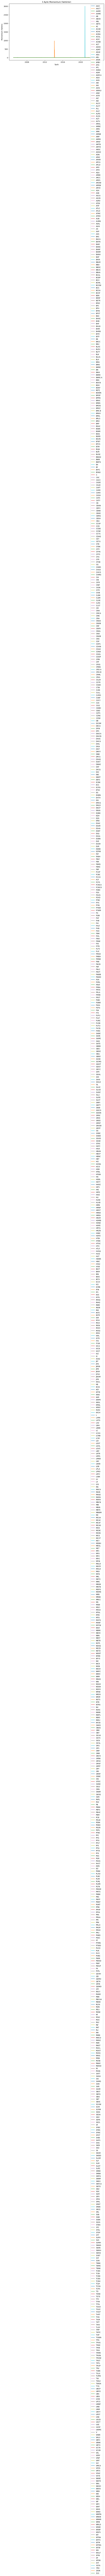

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for ticker in Finans_veri.columns:
    plt.plot(Finans_veri.index, Finans_veri[ticker], label=ticker)

plt.title('3 Aylık Momentum Faktörleri')
plt.xlabel('Tarih')
plt.ylabel('Momentum Faktörü')
plt.legend()
plt.show()

### Teknoloji verilerinden 4 haftalık momentum hesaplanması

In [34]:
technology = pd.read_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/technology.csv')
technology.Symbol

0      MSFT
1      AAPL
2      NVDA
3       TSM
4      AVGO
       ... 
782    SYTA
783    XTKG
784    MYSZ
785    WISA
786    ASTI
Name: Symbol, Length: 787, dtype: object

In [35]:
# 'Symbol' sütunundaki geçerli sembolleri al
valid_symbols_technology = technology['Symbol'].tolist()

# Geçerli semboller listesindeki her bir öğeyi string olarak kontrol et
valid_symbols_technology  = [str(symbol) for symbol in valid_symbols_technology if isinstance(symbol, str)]

# 'yfinance.download()' işlevine geçirilecek olan geçerli sembolleri kullanarak verileri indir
data_technologies = yfinance.download(valid_symbols_technology, start='2005-01-01')

[*********************100%%**********************]  786 of 786 completed

8 Failed downloads:
['ERIC']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1104555600&period2=1710626437&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains&crumb=bHU.VXVfKE7 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000261629248D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))
['G']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/%ticker%?period1=1104555600&period2=1710626437&interval=1d&includePrePost=False&events=div%2Csplits%2Ccapital%ticker%ains&crumb=bHU.VXVfKE7 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002615FF135D0>: Failed to establish a new connection: [Errno 11001] get

In [36]:
data_technologies

Price      Adj Close                                                     \
Ticker          AAOI AAPL       ACIW        ACLS       ACMR         ACN   
Date                                                                      
2005-01-03       NaN  NaN   6.510000   31.559999        NaN   18.926397   
2005-01-04       NaN  NaN   6.183333   29.559999        NaN   18.481409   
2005-01-05       NaN  NaN   6.093333   27.840000        NaN   18.409641   
2005-01-06       NaN  NaN   6.170000   27.760000        NaN   18.244564   
2005-01-07       NaN  NaN   6.026667   27.160000        NaN   19.098650   
...              ...  ...        ...         ...        ...         ...   
2024-03-11     14.31  NaN  32.150002  112.480003  28.340000  373.220001   
2024-03-12     14.26  NaN  32.200001  111.889999  29.350000  380.480011   
2024-03-13     13.98  NaN  31.730000  108.650002  28.750000  378.720001   
2024-03-14     12.92  NaN  31.469999  108.110001  27.469999  378.209991   
2024-03-15     12.70  NaN  31.830000  107.610001  27.110001  374.600006   

Price                                                      ...     Volume  \
Ticker            ADBE       ADEA         ADI        ADSK  ...        YOU   
Date                                                       ...              
2005-01-03   30.838949   7.616433   23.091391   37.410706  ...        NaN   
2005-01-04   30.024111   7.510948   22.463192   34.981960  ...        NaN   
2005-01-05   29.859142   7.330120   22.564714   35.251820  ...        NaN   
2005-01-06   29.364239   7.317203   22.526638   35.081905  ...        NaN   
2005-01-07   29.384233   7.297826   22.558359   34.282318  ...        NaN   
...                ...        ...         ...         ...  ...        ...   
2024-03-11  560.419983  11.020000  198.210007  258.260010  ...   932100.0   
2024-03-12  579.140015  11.040000  199.199997  262.779999  ...  1036500.0   
2024-03-13  573.549988  11.020000  198.600006  258.700012  ...  1984500.0   
2024-03-14  570.450012  10.870000  194.429993  258.529999  ...  2008800.0   
2024-03-15  492.459991  11.150000  195.199997  254.240005  ...  2720600.0   

Price                                                                    \
Ticker         ZBRA      ZENV     ZEPP       ZETA      ZFOX          ZI   
Date                                                                      
2005-01-03   443500       NaN      NaN        NaN       NaN         NaN   
2005-01-04   696500       NaN      NaN        NaN       NaN         NaN   
2005-01-05  1054400       NaN      NaN        NaN       NaN         NaN   
2005-01-06   280000       NaN      NaN        NaN       NaN         NaN   
2005-01-07   351600       NaN      NaN        NaN       NaN         NaN   
...             ...       ...      ...        ...       ...         ...   
2024-03-11   268800   44200.0  88100.0  1302800.0  230700.0   6374000.0   
2024-03-12   316100   23300.0  44900.0  1139000.0  305700.0   8992700.0   
2024-03-13   286200    6900.0  62700.0  1218600.0  157700.0   4706400.0   
2024-03-14   375300   24800.0  63400.0  1080200.0  339200.0   5904500.0   
2024-03-15   539300  106400.0  49000.0  1937700.0  124100.0  11331700.0   

Price                                        
Ticker             ZM         ZS        ZUO  
Date                                         
2005-01-03        NaN        NaN        NaN  
2005-01-04        NaN        NaN        NaN  
2005-01-05        NaN        NaN        NaN  
2005-01-06        NaN        NaN        NaN  
2005-01-07        NaN        NaN        NaN  
...               ...        ...        ...  
2024-03-11  4434000.0  1825900.0  1114300.0  
2024-03-12  3160600.0  2305000.0  1853200.0  
2024-03-13  2402900.0  1753200.0   963600.0  
2024-03-14  1902800.0  1220700.0  1285300.0  
2024-03-15  5674700.0  2664700.0  3380500.0  

[4833 rows x 4716 columns]

In [37]:
# Haftalık açılış fiyatlarını alın, ilk işlem gününün açılış fiyatını kullanarak
data_open_technologies = data_technologies['Open'].resample('W-MON').first()

# Haftalık getirileri hesaplayın
weekly_returns_technologies = data_open_technologies.pct_change() + 1


In [38]:
weekly_returns_technologies

Ticker,AAOI,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,ADSK,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,NaN,NaN,0.962170,0.970552,NaN,0.974026,0.987460,0.961105,0.989735,0.978329,...,NaN,0.986972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-17,NaN,NaN,0.931712,0.883692,NaN,1.019048,0.947275,0.975719,0.957969,0.916733,...,NaN,0.956118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-24,NaN,NaN,0.996669,1.030043,NaN,0.960748,0.985237,1.094108,1.011396,0.891412,...,NaN,0.953358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-31,NaN,NaN,0.993872,0.962500,NaN,0.968872,0.960903,0.941438,0.963380,0.912149,...,NaN,0.984344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,0.984623,NaN,1.031746,0.902509,1.103491,0.975413,0.953835,1.000000,0.973863,1.000275,...,0.997407,1.044080,1.472973,1.133333,1.002073,1.009091,1.153048,0.991658,1.030096,0.984848
2024-02-26,1.043829,NaN,1.015050,0.976565,1.054384,1.023436,0.890732,0.960643,0.995164,1.008617,...,0.991160,1.071809,0.899083,0.955882,1.048604,1.000000,0.965129,0.979365,1.039657,0.973964
2024-03-04,0.731178,NaN,1.028666,0.978105,1.154737,1.019249,1.064741,0.947324,1.013618,1.008466,...,0.954879,1.035945,0.984694,0.923077,1.030572,1.000000,0.999417,1.088331,0.968485,1.032807


In [39]:
Teknoloji_veri = get_rolling_ret(weekly_returns_technologies, 4) # 4 haftalık momentum hesapladık
Teknoloji_veri.fillna(Teknoloji_veri.mean(), inplace=True)

Teknoloji_veri

Ticker,AAOI,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,ADSK,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,1.033406,NaN,1.011219,1.021278,1.057416,1.012518,1.015399,1.007795,1.009127,1.013316,...,0.990607,1.011079,0.981010,0.986979,1.020563,0.970213,0.991695,1.011780,1.040144,1.002536
2005-01-10,1.033406,NaN,1.011219,1.021278,1.057416,1.012518,1.015399,1.007795,1.009127,1.013316,...,0.990607,1.011079,0.981010,0.986979,1.020563,0.970213,0.991695,1.011780,1.040144,1.002536
2005-01-17,1.033406,NaN,1.011219,1.021278,1.057416,1.012518,1.015399,1.007795,1.009127,1.013316,...,0.990607,1.011079,0.981010,0.986979,1.020563,0.970213,0.991695,1.011780,1.040144,1.002536
2005-01-24,1.033406,NaN,1.011219,1.021278,1.057416,1.012518,1.015399,1.007795,1.009127,1.013316,...,0.990607,1.011079,0.981010,0.986979,1.020563,0.970213,0.991695,1.011780,1.040144,1.002536
2005-01-31,1.033406,NaN,0.888004,0.850307,1.057416,0.923933,0.885556,0.965933,0.923825,0.729243,...,0.990607,0.885563,0.981010,0.986979,1.020563,0.970213,0.991695,1.011780,1.040144,1.002536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,1.163541,NaN,1.002683,0.989589,0.846009,1.025655,1.006528,1.116592,1.001650,1.057683,...,0.890690,1.021296,1.912281,0.804734,1.012565,1.460526,1.147837,0.901288,1.053609,1.014406
2024-02-26,1.206053,NaN,0.981248,0.821557,0.883721,1.006860,0.882582,0.996667,0.949833,1.020503,...,0.951098,1.054759,1.899225,0.838710,1.023209,1.608696,1.065838,0.886622,1.038842,0.872746
2024-03-04,0.883382,NaN,0.993003,0.832129,1.181476,1.008021,0.898270,0.919643,0.969208,1.011227,...,0.896994,1.092117,1.707965,0.923077,1.045000,1.037383,1.025105,0.982731,1.002424,0.904255


In [132]:
# CSV dosyası olarak kaydetme
dosya_yolu = 'C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/momentum_FTH/teknoloji_momentum.csv'
Teknoloji_veri.to_csv(dosya_yolu)


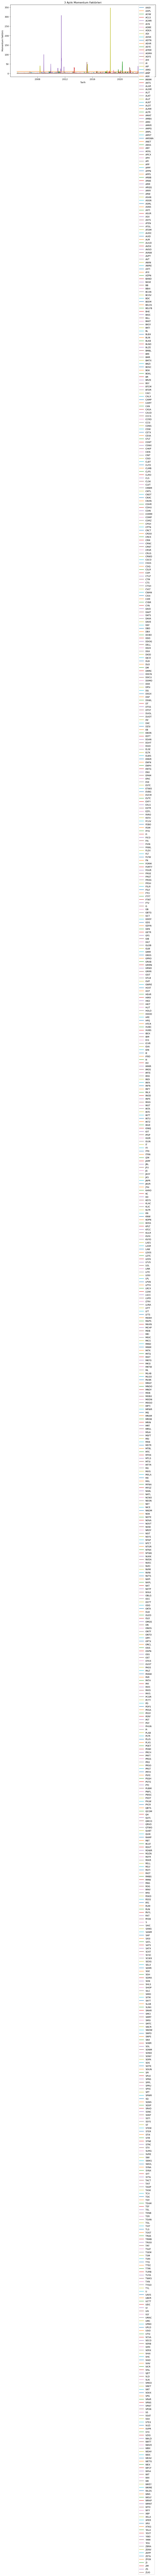

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for ticker in Teknoloji_veri.columns:
    plt.plot(Teknoloji_veri.index, Teknoloji_veri[ticker], label=ticker)

plt.title('3 Aylık Momentum Faktörleri')
plt.xlabel('Tarih')
plt.ylabel('Momentum Faktörü')
plt.legend()
plt.show()

In [134]:
# En yüksek momentum faktörüne sahip hisse senedinin adını bulma
en_yuksek_momentum = Teknoloji_veri.max()
en_yuksek_momentum_hisse = en_yuksek_momentum.idxmax()

print("En yüksek momentum faktörüne sahip hisse senedi:", en_yuksek_momentum_hisse)

En yüksek momentum faktörüne sahip hisse senedi: QUBT


In [135]:
# En yüksek 5 momentum faktörüne sahip hisse senetlerini bulma
en_yuksek_momentum = Teknoloji_veri.max()
en_yuksek_5 = en_yuksek_momentum.nlargest(5)

print("En yüksek 5 momentum faktörüne sahip hisse senetleri:")
print(en_yuksek_5)


En yüksek 5 momentum faktörüne sahip hisse senetleri:
Ticker
QUBT    346.666662
INPX    307.076921
WETG    246.666662
INLX     62.500001
SSNT     59.999999
dtype: float64


### Sağlık verilerinden 4 haftalık momentum hesaplanması

In [40]:
healthcare = pd.read_csv('C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/healthcare.csv')
healthcare.Symbol

0        LLY
1        NVO
2        UNH
3        JNJ
4       ABBV
        ... 
1214    SXTC
1215    MOTS
1216     NBY
1217     GRI
1218    RNAZ
Name: Symbol, Length: 1219, dtype: object

In [41]:
# 'Symbol' sütunundaki geçerli sembolleri al
valid_symbols_healthcare = healthcare['Symbol'].tolist()

# Geçerli semboller listesindeki her bir öğeyi string olarak kontrol et
valid_symbols_healthcare  = [str(symbol) for symbol in valid_symbols_healthcare if isinstance(symbol, str)]

# 'yfinance.download()' işlevine geçirilecek olan geçerli sembolleri kullanarak verileri indir
data_healthcare = yfinance.download(valid_symbols_healthcare, start='2005-01-01')
 

[*********************100%%**********************]  1219 of 1219 completed

1 Failed download:
['BIO.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2005-01-01 -> 2024-03-16)')


In [42]:
data_healthcare

Price        Adj Close                                                         \
Ticker               A  AADI        ABBV  ABCL      ABEO           ABIO  ABOS   
Date                                                                            
2005-01-03   14.488482   NaN         NaN   NaN  21500.00  148932.000000   NaN   
2005-01-04   14.106244   NaN         NaN   NaN  21750.00  148932.000000   NaN   
2005-01-05   14.100182   NaN         NaN   NaN  20812.50  148327.203125   NaN   
2005-01-06   13.790754   NaN         NaN   NaN  20812.50  150595.203125   NaN   
2005-01-07   13.778616   NaN         NaN   NaN  20312.50  148629.593750   NaN   
...                ...   ...         ...   ...       ...            ...   ...   
2024-03-11  147.289993  2.15  179.630005  4.96      7.81       1.650000  4.28   
2024-03-12  147.839996  1.94  180.919998  4.88      8.18       1.660000  4.12   
2024-03-13  147.820007  2.16  179.860001  4.91      8.23       1.690000  4.35   
2024-03-14  145.210007  2.05  181.199997  4.70      8.14       1.700000  4.09   
2024-03-15  147.479996  2.17  177.880005  4.71      8.63       1.690000  4.18   

Price                               ...     Volume                        \
Ticker      ABSI         ABT  ABUS  ...       ZLAB       ZNTL        ZOM   
Date                                ...                                    
2005-01-03   NaN   14.846619   NaN  ...        NaN        NaN        NaN   
2005-01-04   NaN   14.697101   NaN  ...        NaN        NaN        NaN   
2005-01-05   NaN   14.528505   NaN  ...        NaN        NaN        NaN   
2005-01-06   NaN   14.856168   NaN  ...        NaN        NaN        NaN   
2005-01-07   NaN   15.110657   NaN  ...        NaN        NaN        NaN   
...          ...         ...   ...  ...        ...        ...        ...   
2024-03-11  4.70  120.190002  2.72  ...   637600.0  1618700.0  4317500.0   
2024-03-12  4.94  120.760002  2.69  ...   396700.0  1013900.0  3869800.0   
2024-03-13  4.88  120.160004  2.70  ...  1127600.0  1078400.0  3379900.0   
2024-03-14  4.79  118.849998  2.61  ...   493400.0  1065800.0  5978400.0   
2024-03-15  4.90  115.489998  2.62  ...   545200.0  2308000.0  4286700.0   

Price                                                                    \
Ticker         ZTEK        ZTS     ZURA      ZVRA       ZVSA       ZYME   
Date                                                                      
2005-01-03      NaN        NaN      NaN       NaN        NaN        NaN   
2005-01-04      NaN        NaN      NaN       NaN        NaN        NaN   
2005-01-05      NaN        NaN      NaN       NaN        NaN        NaN   
2005-01-06      NaN        NaN      NaN       NaN        NaN        NaN   
2005-01-07      NaN        NaN      NaN       NaN        NaN        NaN   
...             ...        ...      ...       ...        ...        ...   
2024-03-11  35000.0  3383500.0  80000.0  232300.0  1060000.0   407400.0   
2024-03-12  15400.0  2598400.0  59300.0  213500.0   484400.0   760700.0   
2024-03-13  27200.0  5947400.0  65000.0  197500.0   368300.0   688100.0   
2024-03-14  23100.0  6432600.0  87700.0  201400.0   389300.0   730700.0   
2024-03-15  28700.0  3399500.0  93400.0  595100.0   420200.0  1007600.0   

Price               
Ticker        ZYXI  
Date                
2005-01-03     660  
2005-01-04       0  
2005-01-05    6050  
2005-01-06   89870  
2005-01-07    7480  
...            ...  
2024-03-11  151500  
2024-03-12  151100  
2024-03-13   89900  
2024-03-14  313900  
2024-03-15  235100  

[4833 rows x 7314 columns]

In [43]:
# Haftalık açılış fiyatlarını alın, ilk işlem gününün açılış fiyatını kullanarak
data_open_healthcare = data_healthcare['Open'].resample('W-MON').first()

# Haftalık getirileri hesaplayın
weekly_returns_healthcare = data_open_healthcare.pct_change() + 1

In [44]:
weekly_returns_healthcare

Ticker,A,AADI,ABBV,ABCL,ABEO,ABIO,ABOS,ABSI,ABT,ABUS,...,ZLAB,ZNTL,ZOM,ZTEK,ZTS,ZURA,ZVRA,ZVSA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,0.986722,NaN,NaN,NaN,0.955556,0.998999,NaN,NaN,1.003871,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2005-01-17,0.933978,NaN,NaN,NaN,0.930233,0.998998,NaN,NaN,1.028278,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866669
2005-01-24,0.986493,NaN,NaN,NaN,0.937500,0.934804,NaN,NaN,0.959375,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.038462
2005-01-31,0.981743,NaN,NaN,NaN,1.046667,0.906652,NaN,NaN,0.997611,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.037033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,0.982586,1.104651,1.016371,1.054767,1.482353,1.024845,1.045752,1.026961,1.005813,1.169492,...,0.798226,0.976827,1.112000,0.942857,0.971875,1.271341,1.033043,0.932787,1.053358,1.067177
2024-02-26,1.025549,0.989474,1.007853,1.038462,1.126984,1.012121,1.012500,1.264916,1.016538,1.047101,...,1.111111,1.183394,0.935252,0.954545,1.003751,0.928058,1.149832,1.054482,1.055895,0.998406
2024-03-04,0.983392,1.058511,1.016721,0.920370,1.061972,0.970060,1.148148,0.943396,1.033500,1.017301,...,1.137000,1.111796,0.946154,0.976190,1.055259,0.948320,1.010249,1.966667,1.035567,1.023943


In [45]:
Saglık_veri = get_rolling_ret(weekly_returns_healthcare, 4) # 4 haftalık momentum hesapladık
Saglık_veri.fillna(Saglık_veri.mean(), inplace=True)

Saglık_veri


Ticker,A,AADI,ABBV,ABCL,ABEO,ABIO,ABOS,ABSI,ABT,ABUS,...,ZLAB,ZNTL,ZOM,ZTEK,ZTS,ZURA,ZVRA,ZVSA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,1.011727,0.986601,1.013676,0.962214,1.007556,0.981808,0.986110,0.995843,1.008090,1.025816,...,1.012140,1.010939,1.028652,1.034380,1.014094,0.939934,1.002172,0.861252,1.013854,1.044873
2005-01-10,1.011727,0.986601,1.013676,0.962214,1.007556,0.981808,0.986110,0.995843,1.008090,1.025816,...,1.012140,1.010939,1.028652,1.034380,1.014094,0.939934,1.002172,0.861252,1.013854,1.044873
2005-01-17,1.011727,0.986601,1.013676,0.962214,1.007556,0.981808,0.986110,0.995843,1.008090,1.025816,...,1.012140,1.010939,1.028652,1.034380,1.014094,0.939934,1.002172,0.861252,1.013854,1.044873
2005-01-24,1.011727,0.986601,1.013676,0.962214,1.007556,0.981808,0.986110,0.995843,1.008090,1.025816,...,1.012140,1.010939,1.028652,1.034380,1.014094,0.939934,1.002172,0.861252,1.013854,1.044873
2005-01-31,0.892531,0.986601,1.013676,0.962214,0.872222,0.845846,0.986110,0.995843,0.987957,1.025816,...,1.012140,1.010939,1.028652,1.034380,1.014094,0.939934,1.002172,0.861252,1.013854,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,1.009292,1.104651,1.077047,0.973783,1.209213,1.024845,0.837696,1.063452,0.990838,1.179487,...,0.737101,0.780627,0.868750,1.031250,0.941901,1.083117,1.015385,0.768919,1.064126,1.252495
2024-02-26,1.000224,1.119048,1.069200,0.978261,1.392157,1.050314,0.952941,1.409575,0.998952,1.209205,...,0.873362,0.921820,0.977444,1.050000,0.977813,0.900000,1.142140,0.988468,1.191133,1.174320
2024-03-04,0.989611,1.150289,1.088601,0.887500,1.554639,0.958580,1.094118,1.256281,1.037401,1.157480,...,1.015179,1.106677,0.911111,0.976190,1.024784,1.092262,1.120130,1.909385,1.171188,1.128408


In [148]:
# CSV dosyası olarak kaydetme
dosya_yolu = 'C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/momentum_FTH/saglık_momentum.csv'
Saglık_veri.to_csv(dosya_yolu)


### TSfresh ile Feature Engineering

In [93]:
!pip install tsfresh

In [94]:
!pip install tsfeatures

In [129]:
from tsfresh import extract_features

FinansTS = Finans_veri
# Veriyi yeniden düzenleyin
FinansTS = FinansTS.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Open')


In [136]:
# NaN değerlerini kontrol etmek için isna() fonksiyonunu kullanın
nan_values = FinansTS.isna()

# Her sütundaki toplam NaN değerlerinin sayısını alın
total_nan_values = nan_values.sum()

# NaN değerlerinin olduğu sütunları ve bu sütunlardaki toplam NaN değer sayısını görüntüleyin
print("NaN değerlerinin olduğu sütunlar:")
print(total_nan_values[total_nan_values > 0])

NaN değerlerinin olduğu sütunlar:
Open    9027
dtype: int64


In [137]:
FinansTS_filled = FinansTS.fillna(method='ffill')


In [138]:
# NaN değerlerini kontrol etmek için isna() fonksiyonunu kullanın
nan_values = FinansTS_filled.isna()

# Her sütundaki toplam NaN değerlerinin sayısını alın
total_nan_values = nan_values.sum()

# NaN değerlerinin olduğu sütunları ve bu sütunlardaki toplam NaN değer sayısını görüntüleyin
print("NaN değerlerinin olduğu sütunlar:")
print(total_nan_values[total_nan_values > 0])

NaN değerlerinin olduğu sütunlar:
Series([], dtype: int64)


In [139]:
extracted_features = extract_features(FinansTS_filled, column_id='Ticker', column_sort='Date')

Feature Extraction: 100%|██████████| 39/39 [02:29<00:00,  3.84s/it]


In [141]:
finans_features = extracted_features
finans_features

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AACI,0.0,0.0,0.0,1.0,1007.007496,1011.047455,0.000680,-0.000005,-2.739065e-06,1.003996,...,0.090729,0.090729,0.090729,0.426685,0.633936,0.797409,0.893617,0.924098,NaN,1.031537
AACT,0.0,0.0,0.0,1.0,1007.296737,1011.612045,0.000064,-0.000001,-4.752730e-07,1.004284,...,0.090729,0.090729,0.090729,0.187397,0.239951,0.272229,0.284519,0.284767,NaN,1.007364
AAMC,0.0,0.0,0.0,1.0,1049.253211,1111.558797,0.016696,-0.000206,1.159256e-05,1.046115,...,0.090729,0.090729,0.090729,0.380346,0.540958,0.668014,0.745802,0.784865,NaN,1.904397
AAME,0.0,0.0,0.0,1.0,1011.098839,1040.149769,0.077952,0.000192,9.990010e-05,1.000000,...,0.846820,1.283364,3.250830,1.775688,3.107159,4.552506,5.823934,6.567163,NaN,2.031848
AB,0.0,0.0,0.0,1.0,1007.347091,1021.377265,0.050260,0.000013,1.764321e-05,1.008803,...,0.891603,1.298315,3.028133,1.719724,2.947263,4.281784,5.444734,6.282465,NaN,1.330821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYF,0.0,0.0,0.0,1.0,1003.244896,1023.140835,0.038728,0.000060,1.755764e-05,1.000244,...,0.376590,0.700847,2.438707,0.879132,1.342061,1.754318,2.031758,2.160431,NaN,1.974958
YOTA,0.0,0.0,0.0,1.0,1008.218868,1013.474582,0.000427,0.000003,-1.036452e-05,1.005203,...,0.090729,0.090729,0.090729,0.352078,0.501349,0.619014,0.674492,0.683079,NaN,1.028350
YRD,0.0,0.0,0.0,1.0,1024.657058,1075.597748,0.053739,0.000215,-7.477771e-06,1.021592,...,0.773106,1.111111,2.919952,1.117550,1.772466,2.427670,2.937012,3.183521,NaN,2.223706
ZION,0.0,0.0,0.0,1.0,1008.329581,1028.438147,0.057046,0.000047,2.806819e-05,1.003494,...,0.747349,1.144007,2.935828,1.725886,2.946518,4.297999,5.480206,6.306021,NaN,1.616852


In [135]:
FinansTS


,Date,Ticker,Open
0,2005-01-03,AACI,1.003996
1,2005-01-10,AACI,1.003996
2,2005-01-17,AACI,1.003996
3,2005-01-24,AACI,1.003996
4,2005-01-31,AACI,1.003996
...,...,...,...
1006004,2024-02-19,ZLS,1.006542
1006005,2024-02-26,ZLS,1.000000
1006006,2024-03-04,ZLS,1.000930
1006007,2024-03-11,ZLS,0.999072


In [142]:
TeknolojiTS = Teknoloji_veri
# Veriyi yeniden düzenleyin
TeknolojiTS = TeknolojiTS.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Open')


In [143]:
nan_values = TeknolojiTS.isna()

total_nan_values = nan_values.sum()

print("NaN değerlerinin olduğu sütunlar:")
print(total_nan_values[total_nan_values > 0])

NaN değerlerinin olduğu sütunlar:
Open    10030
dtype: int64


In [144]:
TeknolojiTS_filled = TeknolojiTS.fillna(method='ffill')

In [145]:
nan_values = TeknolojiTS_filled.isna()

total_nan_values = nan_values.sum()

print("NaN değerlerinin olduğu sütunlar:")
print(total_nan_values[total_nan_values > 0])

NaN değerlerinin olduğu sütunlar:
Series([], dtype: int64)


In [146]:
extracted_features = extract_features(TeknolojiTS_filled, column_id='Ticker', column_sort='Date')

Feature Extraction: 100%|██████████| 40/40 [02:03<00:00,  3.10s/it]


In [148]:
teknoloji_features = extracted_features
teknoloji_features

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AAOI,0.0,0.0,0.0,1.0,1036.505786,1112.156590,0.066207,-0.000307,-0.000003,1.033406,...,0.817285,1.187366,2.865288,1.276419,2.055934,2.828267,3.457563,3.856310,NaN,2.363886
AAPL,0.0,1.0,1.0,1.0,728.122396,528.576495,0.000000,0.000000,0.000000,0.725945,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,0.725945
ACIW,0.0,0.0,0.0,1.0,1014.252484,1035.133678,0.052679,0.000060,-0.000009,1.009226,...,0.871249,1.133481,2.902346,1.722545,2.957959,4.315342,5.481575,6.319545,NaN,1.365193
ACLS,0.0,0.0,0.0,1.0,1024.342325,1076.210561,0.089201,-0.000041,0.000055,1.013986,...,0.934893,1.369328,3.077113,1.721326,2.944681,4.285920,5.460070,6.298401,NaN,1.739965
ACMR,0.0,0.0,0.0,1.0,1060.588442,1141.415337,0.043952,0.000538,-0.000161,1.057416,...,0.647914,1.078673,2.672248,0.955027,1.455569,1.934027,2.283836,2.448136,NaN,1.899434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,0.0,0.0,0.0,1.0,973.123649,950.631065,0.015146,0.000030,-0.000005,0.970213,...,0.090729,0.136002,0.514296,0.546852,0.813108,1.041992,1.186036,1.254622,NaN,1.475059
ZI,0.0,0.0,0.0,1.0,994.670189,991.258642,0.019046,-0.000052,-0.000061,0.991695,...,0.902819,1.441088,3.305199,0.658529,0.971078,1.234114,1.397474,1.470592,NaN,1.350836
ZM,0.0,0.0,0.0,1.0,1014.815307,1033.525079,0.022391,0.000099,0.000015,1.011780,...,0.482771,0.785397,2.588206,0.798095,1.190242,1.549505,1.794517,1.915011,NaN,1.536745
ZS,0.0,0.0,0.0,1.0,1043.263949,1093.287429,0.028775,-0.000201,-0.000027,1.040144,...,0.541301,0.906350,2.614875,0.905498,1.383292,1.836219,2.147011,2.320525,NaN,1.489809


In [155]:
SaglıkTS = Saglık_veri
# Veriyi yeniden düzenleyin
SaglıkTS = SaglıkTS.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Open')

In [156]:
nan_values = SaglıkTS.isna()

total_nan_values = nan_values.sum()

print("NaN değerlerinin olduğu sütunlar:")
print(total_nan_values[total_nan_values > 0])

NaN değerlerinin olduğu sütunlar:
Open    1003
dtype: int64


In [157]:
SaglıkTS_filled = SaglıkTS.fillna(method='ffill')

In [158]:
nan_values = SaglıkTS_filled.isna()

total_nan_values = nan_values.sum()

print("NaN değerlerinin olduğu sütunlar:")
print(total_nan_values[total_nan_values > 0])

NaN değerlerinin olduğu sütunlar:
Series([], dtype: int64)


In [159]:
extracted_features = extract_features(SaglıkTS_filled, column_id='Ticker', column_sort='Date')

Feature Extraction: 100%|██████████| 40/40 [03:12<00:00,  4.82s/it]


In [162]:
saglık_features = extracted_features
saglık_features.head()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
A,0.0,0.0,0.0,1.0,1014.761764,1032.814315,0.041679,0.000121,0.000027,1.012786,...,0.903911,1.321354,3.053036,1.718731,2.943594,4.300416,5.477247,6.285596,NaN,1.239601
AADI,0.0,0.0,0.0,1.0,989.560407,995.126374,0.038324,0.000145,-0.000120,0.986601,...,0.603718,0.961039,2.394099,0.925556,1.401928,1.839492,2.149534,2.320184,NaN,1.900818
ABBV,0.0,0.0,0.0,1.0,1016.717503,1033.409794,0.021581,0.000016,-0.000003,1.013676,...,0.766972,1.144600,2.849829,1.351433,2.169145,3.003973,3.690724,4.101382,NaN,1.211803
ABCL,0.0,0.0,0.0,1.0,965.101107,933.572940,0.017138,-0.000006,-0.000022,0.962214,...,0.867516,1.319614,2.870050,0.544108,0.815184,1.053211,1.204558,1.284750,NaN,1.346606
ABEO,0.0,0.0,0.0,1.0,1010.578458,1114.522445,0.154315,0.000217,-0.000298,0.958904,...,0.809392,1.220572,2.980462,1.749662,3.029834,4.428817,5.638063,6.403029,NaN,2.882458


In [184]:
# Her bir DataFrame'i birleştirin
FST_features = pd.concat([finans_features, saglık_features,  teknoloji_features], axis=0)

# Sektor sütununu oluşturun ve uygun şekilde doldurun
FST_features['Sektor'] = ['F'] * len(finans_features) + ['S'] * len(saglık_features) + ['T'] * len(teknoloji_features)

# Sonuçları kontrol edin
print("Combined Features Shape:", FST_features.shape)

Combined Features Shape: (3008, 784)


In [191]:
FST_features

,Sektor,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AACI,F,0.0,0.0,0.0,1.0,1007.007496,1011.047455,0.000680,-0.000005,-2.739065e-06,...,0.090729,0.090729,0.090729,0.426685,0.633936,0.797409,0.893617,0.924098,NaN,1.031537
AACT,F,0.0,0.0,0.0,1.0,1007.296737,1011.612045,0.000064,-0.000001,-4.752730e-07,...,0.090729,0.090729,0.090729,0.187397,0.239951,0.272229,0.284519,0.284767,NaN,1.007364
AAMC,F,0.0,0.0,0.0,1.0,1049.253211,1111.558797,0.016696,-0.000206,1.159256e-05,...,0.090729,0.090729,0.090729,0.380346,0.540958,0.668014,0.745802,0.784865,NaN,1.904397
AAME,F,0.0,0.0,0.0,1.0,1011.098839,1040.149769,0.077952,0.000192,9.990010e-05,...,0.846820,1.283364,3.250830,1.775688,3.107159,4.552506,5.823934,6.567163,NaN,2.031848
AB,F,0.0,0.0,0.0,1.0,1007.347091,1021.377265,0.050260,0.000013,1.764321e-05,...,0.891603,1.298315,3.028133,1.719724,2.947263,4.281784,5.444734,6.282465,NaN,1.330821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,T,0.0,0.0,0.0,1.0,973.123649,950.631065,0.015146,0.000030,-4.540909e-06,...,0.090729,0.136002,0.514296,0.546852,0.813108,1.041992,1.186036,1.254622,NaN,1.475059
ZI,T,0.0,0.0,0.0,1.0,994.670189,991.258642,0.019046,-0.000052,-6.143814e-05,...,0.902819,1.441088,3.305199,0.658529,0.971078,1.234114,1.397474,1.470592,NaN,1.350836
ZM,T,0.0,0.0,0.0,1.0,1014.815307,1033.525079,0.022391,0.000099,1.461536e-05,...,0.482771,0.785397,2.588206,0.798095,1.190242,1.549505,1.794517,1.915011,NaN,1.536745
ZS,T,0.0,0.0,0.0,1.0,1043.263949,1093.287429,0.028775,-0.000201,-2.691627e-05,...,0.541301,0.906350,2.614875,0.905498,1.383292,1.836219,2.147011,2.320525,NaN,1.489809


In [188]:
# Sektor sütununu alın
sektor_sutunu = FST_features['Sektor']

# Sektor sütununu DataFrame'den kaldırın
FST_features.drop(columns=['Sektor'], inplace=True)

# Sektor sütununu istediğiniz yere yerleştirin (mesela, index 0'dan başlar)
FST_features.insert(0, 'Sektor', sektor_sutunu)

# Sonuçları kontrol edin
FST_features.head()

,Sektor,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
AACI,F,0.0,0.0,0.0,1.0,1007.007496,1011.047455,0.000680,-0.000005,-2.739065e-06,...,0.090729,0.090729,0.090729,0.426685,0.633936,0.797409,0.893617,0.924098,NaN,1.031537
AACT,F,0.0,0.0,0.0,1.0,1007.296737,1011.612045,0.000064,-0.000001,-4.752730e-07,...,0.090729,0.090729,0.090729,0.187397,0.239951,0.272229,0.284519,0.284767,NaN,1.007364
AAMC,F,0.0,0.0,0.0,1.0,1049.253211,1111.558797,0.016696,-0.000206,1.159256e-05,...,0.090729,0.090729,0.090729,0.380346,0.540958,0.668014,0.745802,0.784865,NaN,1.904397
AAME,F,0.0,0.0,0.0,1.0,1011.098839,1040.149769,0.077952,0.000192,9.990010e-05,...,0.846820,1.283364,3.250830,1.775688,3.107159,4.552506,5.823934,6.567163,NaN,2.031848
AB,F,0.0,0.0,0.0,1.0,1007.347091,1021.377265,0.050260,0.000013,1.764321e-05,...,0.891603,1.298315,3.028133,1.719724,2.947263,4.281784,5.444734,6.282465,NaN,1.330821


In [198]:
FST_features = FST_features.reset_index(drop=True)

In [199]:
dosya_yolu = 'C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/momentum_FTH/FST_features.csv'

# FST_features'u CSV dosyasına kaydetme
FST_features.to_csv(dosya_yolu)

### 5. Yeni Elde Edilmiş Feature ve Sektör Sınıfları Üzerinden Bir Model Kurulması

In [2]:
import pandas as pd

dosya_yolu = 'C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/momentum_FTH/FST_features.csv'

# CSV dosyasını okuma
FST_features = pd.read_csv(dosya_yolu)

FST_features

,Unnamed: 0,Sektor,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
0,0,F,0.0,0.0,0.0,1.0,1007.007496,1011.047455,0.000680,-0.000005,...,0.090729,0.090729,0.090729,0.426685,0.633936,0.797409,0.893617,0.924098,NaN,1.031537
1,1,F,0.0,0.0,0.0,1.0,1007.296737,1011.612045,0.000064,-0.000001,...,0.090729,0.090729,0.090729,0.187397,0.239951,0.272229,0.284519,0.284767,NaN,1.007364
2,2,F,0.0,0.0,0.0,1.0,1049.253211,1111.558797,0.016696,-0.000206,...,0.090729,0.090729,0.090729,0.380346,0.540958,0.668014,0.745802,0.784865,NaN,1.904397
3,3,F,0.0,0.0,0.0,1.0,1011.098839,1040.149769,0.077952,0.000192,...,0.846820,1.283364,3.250830,1.775688,3.107159,4.552506,5.823934,6.567163,NaN,2.031848
4,4,F,0.0,0.0,0.0,1.0,1007.347091,1021.377265,0.050260,0.000013,...,0.891603,1.298315,3.028133,1.719724,2.947263,4.281784,5.444734,6.282465,NaN,1.330821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,3003,T,0.0,0.0,0.0,1.0,973.123649,950.631065,0.015146,0.000030,...,0.090729,0.136002,0.514296,0.546852,0.813108,1.041992,1.186036,1.254622,NaN,1.475059
3004,3004,T,0.0,0.0,0.0,1.0,994.670189,991.258642,0.019046,-0.000052,...,0.902819,1.441088,3.305199,0.658529,0.971078,1.234114,1.397474,1.470592,NaN,1.350836
3005,3005,T,0.0,0.0,0.0,1.0,1014.815307,1033.525079,0.022391,0.000099,...,0.482771,0.785397,2.588206,0.798095,1.190242,1.549505,1.794517,1.915011,NaN,1.536745
3006,3006,T,0.0,0.0,0.0,1.0,1043.263949,1093.287429,0.028775,-0.000201,...,0.541301,0.906350,2.614875,0.905498,1.383292,1.836219,2.147011,2.320525,NaN,1.489809


In [ ]:
FST_features.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
FST_features

,Sektor,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
0,F,0.0,0.0,0.0,1.0,1007.007496,1011.047455,0.000680,-0.000005,-2.739065e-06,...,0.090729,0.090729,0.090729,0.426685,0.633936,0.797409,0.893617,0.924098,NaN,1.031537
1,F,0.0,0.0,0.0,1.0,1007.296737,1011.612045,0.000064,-0.000001,-4.752730e-07,...,0.090729,0.090729,0.090729,0.187397,0.239951,0.272229,0.284519,0.284767,NaN,1.007364
2,F,0.0,0.0,0.0,1.0,1049.253211,1111.558797,0.016696,-0.000206,1.159256e-05,...,0.090729,0.090729,0.090729,0.380346,0.540958,0.668014,0.745802,0.784865,NaN,1.904397
3,F,0.0,0.0,0.0,1.0,1011.098839,1040.149769,0.077952,0.000192,9.990010e-05,...,0.846820,1.283364,3.250830,1.775688,3.107159,4.552506,5.823934,6.567163,NaN,2.031848
4,F,0.0,0.0,0.0,1.0,1007.347091,1021.377265,0.050260,0.000013,1.764321e-05,...,0.891603,1.298315,3.028133,1.719724,2.947263,4.281784,5.444734,6.282465,NaN,1.330821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,T,0.0,0.0,0.0,1.0,973.123649,950.631065,0.015146,0.000030,-4.540909e-06,...,0.090729,0.136002,0.514296,0.546852,0.813108,1.041992,1.186036,1.254622,NaN,1.475059
3004,T,0.0,0.0,0.0,1.0,994.670189,991.258642,0.019046,-0.000052,-6.143814e-05,...,0.902819,1.441088,3.305199,0.658529,0.971078,1.234114,1.397474,1.470592,NaN,1.350836
3005,T,0.0,0.0,0.0,1.0,1014.815307,1033.525079,0.022391,0.000099,1.461536e-05,...,0.482771,0.785397,2.588206,0.798095,1.190242,1.549505,1.794517,1.915011,NaN,1.536745
3006,T,0.0,0.0,0.0,1.0,1043.263949,1093.287429,0.028775,-0.000201,-2.691627e-05,...,0.541301,0.906350,2.614875,0.905498,1.383292,1.836219,2.147011,2.320525,NaN,1.489809


In [8]:
# 'Sektor' sütununu hedef değişken olarak seçme
y = FST_features['Sektor']

# Özellik matrisini oluşturma ve gereksiz sütunları kaldırma
X = FST_features.drop(columns=['Sektor'])


In [9]:
y

0       F
1       F
2       F
3       F
4       F
       ..
3003    T
3004    T
3005    T
3006    T
3007    T
Name: Sektor, Length: 3008, dtype: object

In [10]:
X

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,1.0,1007.007496,1011.047455,0.000680,-0.000005,-2.739065e-06,1.003996,...,0.090729,0.090729,0.090729,0.426685,0.633936,0.797409,0.893617,0.924098,NaN,1.031537
1,0.0,0.0,0.0,1.0,1007.296737,1011.612045,0.000064,-0.000001,-4.752730e-07,1.004284,...,0.090729,0.090729,0.090729,0.187397,0.239951,0.272229,0.284519,0.284767,NaN,1.007364
2,0.0,0.0,0.0,1.0,1049.253211,1111.558797,0.016696,-0.000206,1.159256e-05,1.046115,...,0.090729,0.090729,0.090729,0.380346,0.540958,0.668014,0.745802,0.784865,NaN,1.904397
3,0.0,0.0,0.0,1.0,1011.098839,1040.149769,0.077952,0.000192,9.990010e-05,1.000000,...,0.846820,1.283364,3.250830,1.775688,3.107159,4.552506,5.823934,6.567163,NaN,2.031848
4,0.0,0.0,0.0,1.0,1007.347091,1021.377265,0.050260,0.000013,1.764321e-05,1.008803,...,0.891603,1.298315,3.028133,1.719724,2.947263,4.281784,5.444734,6.282465,NaN,1.330821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,0.0,0.0,0.0,1.0,973.123649,950.631065,0.015146,0.000030,-4.540909e-06,0.970213,...,0.090729,0.136002,0.514296,0.546852,0.813108,1.041992,1.186036,1.254622,NaN,1.475059
3004,0.0,0.0,0.0,1.0,994.670189,991.258642,0.019046,-0.000052,-6.143814e-05,0.991695,...,0.902819,1.441088,3.305199,0.658529,0.971078,1.234114,1.397474,1.470592,NaN,1.350836
3005,0.0,0.0,0.0,1.0,1014.815307,1033.525079,0.022391,0.000099,1.461536e-05,1.011780,...,0.482771,0.785397,2.588206,0.798095,1.190242,1.549505,1.794517,1.915011,NaN,1.536745
3006,0.0,0.0,0.0,1.0,1043.263949,1093.287429,0.028775,-0.000201,-2.691627e-05,1.040144,...,0.541301,0.906350,2.614875,0.905498,1.383292,1.836219,2.147011,2.320525,NaN,1.489809


In [12]:
X = X.dropna(axis=1)


In [13]:
X

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__lempel_ziv_complexity__bins_3,Open__lempel_ziv_complexity__bins_5,Open__lempel_ziv_complexity__bins_10,Open__lempel_ziv_complexity__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,1.0,1007.007496,1011.047455,0.000680,-0.000005,-2.739065e-06,1.003996,...,0.049850,0.057827,0.076770,0.111665,0.426685,0.633936,0.797409,0.893617,0.924098,1.031537
1,0.0,0.0,0.0,1.0,1007.296737,1011.612045,0.000064,-0.000001,-4.752730e-07,1.004284,...,0.056830,0.058824,0.061815,0.067797,0.187397,0.239951,0.272229,0.284519,0.284767,1.007364
2,0.0,0.0,0.0,1.0,1049.253211,1111.558797,0.016696,-0.000206,1.159256e-05,1.046115,...,0.064806,0.068794,0.080758,0.112662,0.380346,0.540958,0.668014,0.745802,0.784865,1.904397
3,0.0,0.0,0.0,1.0,1011.098839,1040.149769,0.077952,0.000192,9.990010e-05,1.000000,...,0.059821,0.160518,0.190429,0.419741,1.775688,3.107159,4.552506,5.823934,6.567163,2.031848
4,0.0,0.0,0.0,1.0,1007.347091,1021.377265,0.050260,0.000013,1.764321e-05,1.008803,...,0.083749,0.138584,0.219342,0.463609,1.719724,2.947263,4.281784,5.444734,6.282465,1.330821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,0.0,0.0,0.0,1.0,973.123649,950.631065,0.015146,0.000030,-4.540909e-06,0.970213,...,0.065803,0.073779,0.081755,0.128614,0.546852,0.813108,1.041992,1.186036,1.254622,1.475059
3004,0.0,0.0,0.0,1.0,994.670189,991.258642,0.019046,-0.000052,-6.143814e-05,0.991695,...,0.085743,0.100698,0.117647,0.166500,0.658529,0.971078,1.234114,1.397474,1.470592,1.350836
3005,0.0,0.0,0.0,1.0,1014.815307,1033.525079,0.022391,0.000099,1.461536e-05,1.011780,...,0.084746,0.102692,0.127617,0.193420,0.798095,1.190242,1.549505,1.794517,1.915011,1.536745
3006,0.0,0.0,0.0,1.0,1043.263949,1093.287429,0.028775,-0.000201,-2.691627e-05,1.040144,...,0.092722,0.118644,0.146560,0.223330,0.905498,1.383292,1.836219,2.147011,2.320525,1.489809


### Ağaç tabanlı bir sınıflandırıcı ile özellikleri önem sırasına göre sırala

In [23]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Ağaç tabanlı bir sınıflandırıcı seçin
clf = RandomForestClassifier()

# Modeli eğitin
clf.fit(X, y)

# Özellik önem değerlerini alın
feature_importances = clf.feature_importances_

# Özellikleri sıralayın
indices = np.argsort(feature_importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))




Feature ranking:
1. feature 691 (0.014144)
2. feature 695 (0.009473)
3. feature 699 (0.007655)
4. feature 692 (0.007643)
5. feature 396 (0.007223)
6. feature 710 (0.006925)
7. feature 708 (0.006809)
8. feature 272 (0.006792)
9. feature 34 (0.006539)
10. feature 707 (0.006347)
11. feature 683 (0.006159)
12. feature 700 (0.006008)
13. feature 688 (0.005621)
14. feature 90 (0.005585)
15. feature 687 (0.005435)
16. feature 269 (0.005370)
17. feature 721 (0.005084)
18. feature 696 (0.005071)
19. feature 718 (0.004859)
20. feature 205 (0.004851)
21. feature 693 (0.004781)
22. feature 91 (0.004688)
23. feature 719 (0.004624)
24. feature 679 (0.004477)
25. feature 722 (0.004390)
26. feature 711 (0.004359)
27. feature 680 (0.004221)
28. feature 689 (0.004162)
29. feature 684 (0.004159)
30. feature 723 (0.004141)
31. feature 705 (0.004131)
32. feature 747 (0.004015)
33. feature 646 (0.003969)
34. feature 88 (0.003776)
35. feature 200 (0.003736)
36. feature 85 (0.003601)
37. feature 372 (0.003555

In [26]:
# Özelliklerin önem sıralamasındaki indekslerini ve önem sıralamasındaki değerlerini birlikte yazdırma
for rank, index in enumerate(selected_indices, start=1):
    importance = feature_importances[index]
    print(f"{rank}. feature {index} ({importance})")


1. feature 691 (0.01414439432189784)
2. feature 695 (0.009473399373480552)
3. feature 699 (0.0076547114868508355)
4. feature 692 (0.007643248441748442)
5. feature 396 (0.007222723175294697)
6. feature 710 (0.006924589821541109)
7. feature 708 (0.006808781368415842)
8. feature 272 (0.006791945258881448)
9. feature 34 (0.006539063962009597)
10. feature 707 (0.006347236607870733)


In [35]:
# X özellik matrisinin sütun adlarını alın
import pandas as pd
column_names = X.columns.tolist()

# 691. sütunun adını bulun
feature_name = column_names[747]
print("691. sütunun adı:", feature_name)


691. sütunun adı: Open__mean_n_absolute_max__number_of_maxima_7


In [36]:
column_names = X.columns.tolist()

# İstenen sütunların indekslerini belirleyin
selected_indices = [691, 695, 699, 692, 396, 710, 708, 272, 34, 707]

# İstenen sütunların adlarını yazdırın
selected_column_names = [column_names[index] for index in selected_indices]
print("İstenen sütunların adları:")
for col_name in selected_column_names:
    print(col_name)

İstenen sütunların adları:
Open__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"var"
Open__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var"
Open__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"var"
Open__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"max"
Open__fft_coefficient__attr_"imag"__coeff_50
Open__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"
Open__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"max"
Open__fft_coefficient__attr_"real"__coeff_26
Open__absolute_maximum
Open__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"var"


In [33]:
X

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__lempel_ziv_complexity__bins_3,Open__lempel_ziv_complexity__bins_5,Open__lempel_ziv_complexity__bins_10,Open__lempel_ziv_complexity__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,1.0,1007.007496,1011.047455,0.000680,-0.000005,-2.739065e-06,1.003996,...,0.049850,0.057827,0.076770,0.111665,0.426685,0.633936,0.797409,0.893617,0.924098,1.031537
1,0.0,0.0,0.0,1.0,1007.296737,1011.612045,0.000064,-0.000001,-4.752730e-07,1.004284,...,0.056830,0.058824,0.061815,0.067797,0.187397,0.239951,0.272229,0.284519,0.284767,1.007364
2,0.0,0.0,0.0,1.0,1049.253211,1111.558797,0.016696,-0.000206,1.159256e-05,1.046115,...,0.064806,0.068794,0.080758,0.112662,0.380346,0.540958,0.668014,0.745802,0.784865,1.904397
3,0.0,0.0,0.0,1.0,1011.098839,1040.149769,0.077952,0.000192,9.990010e-05,1.000000,...,0.059821,0.160518,0.190429,0.419741,1.775688,3.107159,4.552506,5.823934,6.567163,2.031848
4,0.0,0.0,0.0,1.0,1007.347091,1021.377265,0.050260,0.000013,1.764321e-05,1.008803,...,0.083749,0.138584,0.219342,0.463609,1.719724,2.947263,4.281784,5.444734,6.282465,1.330821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,0.0,0.0,0.0,1.0,973.123649,950.631065,0.015146,0.000030,-4.540909e-06,0.970213,...,0.065803,0.073779,0.081755,0.128614,0.546852,0.813108,1.041992,1.186036,1.254622,1.475059
3004,0.0,0.0,0.0,1.0,994.670189,991.258642,0.019046,-0.000052,-6.143814e-05,0.991695,...,0.085743,0.100698,0.117647,0.166500,0.658529,0.971078,1.234114,1.397474,1.470592,1.350836
3005,0.0,0.0,0.0,1.0,1014.815307,1033.525079,0.022391,0.000099,1.461536e-05,1.011780,...,0.084746,0.102692,0.127617,0.193420,0.798095,1.190242,1.549505,1.794517,1.915011,1.536745
3006,0.0,0.0,0.0,1.0,1043.263949,1093.287429,0.028775,-0.000201,-2.691627e-05,1.040144,...,0.092722,0.118644,0.146560,0.223330,0.905498,1.383292,1.836219,2.147011,2.320525,1.489809


In [44]:
selected_columns = [
    'Open__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"var"',
    'Open__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var"',
    'Open__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"var"',
    'Open__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"max"',
    'Open__fft_coefficient__attr_"imag"__coeff_50',
    'Open__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"',
    'Open__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"max"'
    'Open__fft_coefficient__attr_"real"__coeff_26',
    'Open__absolute_maximum',
    'Open__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"var"'
  
]

# Yeni DataFrame'i oluşturmak için istenen sütunları seçin
new_df = X[selected_columns]


In [45]:
X = new_df
X

,"Open__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""var""","Open__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""var""","Open__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""var""","Open__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""max""","Open__fft_coefficient__attr_""imag""__coeff_50","Open__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""mean""","Open__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""max""","Open__fft_coefficient__attr_""real""__coeff_26",Open__absolute_maximum,"Open__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""var"""
0,2.634323e-07,7.800660e-07,3.566742e-06,0.000082,0.110737,0.000030,0.000410,0.131358,1.057312,3.874293e-07
1,2.328736e-09,8.797652e-09,4.048003e-08,0.000006,-0.008431,0.000006,0.000042,-0.012091,1.009690,3.160018e-09
2,1.783171e-04,4.147568e-04,2.868054e-03,0.002721,2.256461,0.001903,0.012470,-4.262413,2.437921,9.241679e-05
3,1.834735e-05,1.621070e-04,6.751488e-04,0.000642,3.255534,0.001218,0.013420,-4.895624,2.733333,1.750381e-04
4,-6.055785e-06,-3.695115e-05,-3.863585e-04,-0.000186,-5.708099,0.001020,0.003535,-1.097755,1.512868,3.342349e-05
...,...,...,...,...,...,...,...,...,...,...
3003,8.693939e-05,2.297184e-04,1.433811e-03,0.001956,2.563339,0.000602,0.005196,3.228378,1.608696,5.168671e-05
3004,6.187402e-05,1.722548e-04,9.707125e-04,0.002043,1.932692,0.000390,0.003964,-1.304575,1.390645,2.552644e-05
3005,4.801309e-05,1.540154e-04,9.842132e-04,0.001961,0.700287,0.001202,0.005944,-4.717695,1.709677,3.291736e-05
3006,6.476587e-05,2.091992e-04,1.279333e-03,0.002478,3.599956,0.001301,0.005766,-1.491131,1.553811,3.300374e-05


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Ölçeklendirme
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
X_scaled

array([[-0.02873663, -0.03025461, -0.02937564, ...,  0.0215003 ,
        -0.05513617, -0.02409861],
       [-0.02873673, -0.03025471, -0.02937573, ...,  0.02100331,
        -0.05559428, -0.02409863],
       [-0.02867355, -0.03020264, -0.02930398, ...,  0.00627779,
        -0.04185504, -0.02409514],
       ...,
       [-0.02871971, -0.03023537, -0.02935111, ...,  0.00470044,
        -0.04886057, -0.02409739],
       [-0.02871378, -0.03022845, -0.02934372, ...,  0.01587908,
        -0.05035997, -0.02409738],
       [-0.02871226, -0.03022637, -0.02934155, ...,  0.03307475,
        -0.04766287, -0.02409656]])

In [51]:
# Verileri eğitim ve test kümelerine ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
 #Model seçimi ve eğitimi
from sklearn.svm import SVC

# Model oluşturma
model = SVC(kernel='linear', random_state=42)

# Modeli eğitme
model.fit(X_train, y_train)

# Modelin performansını değerlendirme
from sklearn.metrics import classification_report, accuracy_score

# Eğitim veri seti üzerinde tahmin yapma
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Eğitim veri seti doğruluğu:", train_accuracy)

# Test veri seti üzerinde tahmin yapma
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test veri seti doğruluğu:", test_accuracy)

# Sınıflandırma raporu
print(classification_report(y_test, test_predictions))

Eğitim veri seti doğruluğu: 0.57356608478803
Test veri seti doğruluğu: 0.5598006644518272
              precision    recall  f1-score   support

           F       0.53      0.86      0.66       215
           S       0.60      0.67      0.63       226
           T       0.00      0.00      0.00       161

    accuracy                           0.56       602
   macro avg       0.38      0.51      0.43       602
weighted avg       0.41      0.56      0.47       602



C:\Users\ensar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ensar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ensar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Enerji sektöründen 'Shel' hissesini kullanarak modele tahmin yaptırma

In [53]:
dosya_yolu = 'C:/Users/ensar/Downloads/yapay zeka/Tubitak/data/stock_sectors/energy.csv'

# CSV dosyasını okuma
energy = pd.read_csv(dosya_yolu)

energy

,Unnamed: 0,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,0,XOM,Exxon Mobil Corporation,432.57B,-0.47%,1086842,344.58B
1,1,CVX,Chevron Corporation,282.31B,-0.34%,504293,200.95B
2,2,SHEL,Shell plc,206.58B,0.53%,531936,386.20B
3,3,TTE,TotalEnergies SE,153.12B,-0.12%,49826,218.95B
4,4,COP,Conoco Phillips,135.58B,-0.04%,339737,58.57B
...,...,...,...,...,...,...,...
247,247,MTR,Mesa Royalty Trust,18.80M,3.38%,1831,4.13M
248,248,HUSA,Houston American Energy Corp.,13.85M,0.78%,8080,872.18K
249,249,MARPS,Marine Petroleum Trust,7.96M,0.25%,3,1.18M
250,250,ENSV,Enservco Corporation,5.23M,-1.02%,20712,22.08M


In [75]:
import yfinance
ticker_list = ['SHEL']
data = yfinance.download(ticker_list, start='2005-01-01')

[*********************100%%**********************]  1 of 1 completed


In [76]:
# Haftalık açılış fiyatlarını alın, ilk işlem gününün açılış fiyatını kullanarak
data_open = data['Open'].resample('W-MON').first()

# Haftalık getirileri hesaplayın
weekly_returns = data_open.pct_change()+1

# NaN değerlerini kaldırın
weekly_returns = weekly_returns.dropna()

In [80]:
# Seriyi DataFrame'e dönüştürme
df = Shel_veri.to_frame()

# 'Date' sütununu indeks yapma
df.reset_index(inplace=True)

# Sütun adlarını yeniden adlandırma
df.columns = ['Date', 'Open']
Shel_veri = df


In [78]:
Shel_veri = get_rolling_ret(weekly_returns, 4) # 4 haftalık momentum hesapladık
Shel_veri.fillna(Shel_veri.mean(), inplace=True)


In [81]:
Shel_veri

,Date,Open
0,2005-01-10,1.003176
1,2005-01-17,1.003176
2,2005-01-24,1.003176
3,2005-01-31,1.013992
4,2005-02-07,1.075516
...,...,...
997,2024-02-19,1.019072
998,2024-02-26,1.052164
999,2024-03-04,1.006641
1000,2024-03-11,0.994455


In [85]:
# Shel_veri DataFrame'ine Ticker sütunu ekleyerek hisse adını belirtme
Shel_veri['Ticker'] = 'Shel'

In [86]:
Shel_veri

,Date,Open,Ticker
0,2005-01-10,1.003176,Shel
1,2005-01-17,1.003176,Shel
2,2005-01-24,1.003176,Shel
3,2005-01-31,1.013992,Shel
4,2005-02-07,1.075516,Shel
...,...,...,...
997,2024-02-19,1.019072,Shel
998,2024-02-26,1.052164,Shel
999,2024-03-04,1.006641,Shel
1000,2024-03-11,0.994455,Shel


In [87]:
from tsfresh import extract_features

# Özellikleri çıkarma
extracted_features = extract_features(Shel_veri, column_id="Ticker", column_sort="Date")


Feature Extraction: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


In [88]:
extracted_features

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Open__fourier_entropy__bins_5,Open__fourier_entropy__bins_10,Open__fourier_entropy__bins_100,Open__permutation_entropy__dimension_3__tau_1,Open__permutation_entropy__dimension_4__tau_1,Open__permutation_entropy__dimension_5__tau_1,Open__permutation_entropy__dimension_6__tau_1,Open__permutation_entropy__dimension_7__tau_1,Open__query_similarity_count__query_None__threshold_0.0,Open__mean_n_absolute_max__number_of_maxima_7
Shel,0.0,0.0,0.0,1.0,1005.182155,1013.609094,0.040203,0.000005,0.000007,1.003176,...,1.027194,1.423501,3.175729,1.715927,2.938077,4.284957,5.462148,6.275558,NaN,1.30721


In [93]:
# Tahmin edilecek hissenin özelliklerini içeren bir DataFrame oluşturun
X = extracted_features[['Open__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"var"',
                        'Open__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var"',
                        'Open__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"var"',
                        'Open__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"max"',
                        'Open__fft_coefficient__attr_"imag"__coeff_50',
                        'Open__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"',
                        'Open__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"max"',
                        'Open__fft_coefficient__attr_"real"__coeff_26',
                        'Open__absolute_maximum',
                        'Open__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"var"']]

# Modeli kullanarak tahmin yapın
tahmin = model.predict(X)

# Tahmin sonucunu ekrana yazdırın
print("Tahmin edilen sektör:", tahmin)


Tahmin edilen sektör: ['F']


C:\Users\ensar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
